In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import tensorflow

In [3]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.callbacks import TensorBoard
from tensorflow import keras
from tensorflow.keras import layers

import matplotlib.pyplot as plt
import numpy as np
import os
import PIL

In [4]:
from tensorflow.keras import models

num_classes = 6

model = Sequential([
    layers.Conv2D(16, (3, 3), strides=1, activation='relu', input_shape=(256, 256, 3)),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    
    layers.Conv2D(64, (3, 3), strides=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    
    layers.Conv2D(16, (3, 3), strides=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.MaxPooling2D(pool_size=(3, 3), strides=2),
    
    layers.Conv2D(2, (3, 3), strides=1, activation='relu'),
    layers.BatchNormalization(),
    layers.Dense(128, activation='relu'),
    layers.GlobalAveragePooling2D(),
    layers.Dense(num_classes, activation='softmax')
    
])

lr_schedule = keras.optimizers.schedules.ExponentialDecay(
    initial_learning_rate=0.001,
    decay_steps=1000,
    decay_rate=0.9)

model.compile(optimizer = keras.optimizers.SGD(learning_rate=lr_schedule),
              loss=tensorflow.keras.losses.SparseCategoricalCrossentropy(from_logits=True),metrics=['accuracy'])

In [5]:
from zipfile import ZipFile
file_name = "/content/drive/MyDrive/Projects/BTP/dataset.zip"

with ZipFile(file_name, 'r') as zip:
  zip.extractall()
  print('Done')

Done


In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1./255, shear_range=0.1, zoom_range=0.1, horizontal_flip=True)
test_datagen = ImageDataGenerator(rescale=1./255)

print('Train Set:')
train_set = train_datagen.flow_from_directory('/content/dataset/train',
                                             target_size=(256,256),
                                             batch_size=16,
                                             class_mode='sparse')

print("")

print('Test Set:')
test_set = test_datagen.flow_from_directory('/content/dataset/test',
                                           target_size=(256,256),
                                           batch_size = 16,
                                           class_mode='sparse',
                                           shuffle=False)

Train Set:
Found 10901 images belonging to 6 classes.

Test Set:
Found 2698 images belonging to 6 classes.


In [7]:
model_3 = tensorflow.keras.models.load_model('/my_model_2.h5')

In [8]:
epochs=10
history_3 = model_3.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=epochs,
  steps_per_epoch=200
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
200/200 [==============================] - 1297s 6s/step - loss: 1.4560 - accuracy: 0.4863 - val_loss: 1.4369 - val_accuracy: 0.5256
Epoch 2/10
200/200 [==============================] - 1298s 6s/step - loss: 1.4350 - accuracy: 0.4964 - val_loss: 1.4056 - val_accuracy: 0.5282
Epoch 3/10
200/200 [==============================] - 1302s 7s/step - loss: 1.4117 - accuracy: 0.5253 - val_loss: 1.3983 - val_accuracy: 0.5589
Epoch 4/10
200/200 [==============================] - 1310s 7s/step - loss: 1.3929 - accuracy: 0.5344 - val_loss: 1.3747 - val_accuracy: 0.5545
Epoch 5/10
200/200 [==============================] - 1303s 7s/step - loss: 1.3912 - accuracy: 0.5394 - val_loss: 1.3460 - val_accuracy: 0.5812
Epoch 6/10
200/200 [==============================] - 1305s 7s/step - loss: 1.3703 - accuracy: 0.5456 - val_loss: 1.3391 - val_accuracy: 0.5471
Epoch 7/10
200/200 [==============================] - 1310s 7s/step - loss: 1.3615 - accuracy: 0.5381 - val_loss: 1.3282 - val_accuracy:

In [10]:
epochs=10
history_4 = model_3.fit_generator(
  train_set,
  validation_data=test_set,
  epochs=epochs,
  steps_per_epoch=200
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/10
200/200 [==============================] - 1289s 6s/step - loss: 1.3107 - accuracy: 0.5578 - val_loss: 1.2753 - val_accuracy: 0.5849
Epoch 2/10
200/200 [==============================] - 1290s 6s/step - loss: 1.2954 - accuracy: 0.5606 - val_loss: 1.2662 - val_accuracy: 0.5860
Epoch 3/10
200/200 [==============================] - 1302s 7s/step - loss: 1.2747 - accuracy: 0.5672 - val_loss: 1.2603 - val_accuracy: 0.5912
Epoch 4/10
200/200 [==============================] - 1296s 6s/step - loss: 1.2602 - accuracy: 0.5634 - val_loss: 1.2522 - val_accuracy: 0.5623
Epoch 5/10
200/200 [==============================] - 1297s 6s/step - loss: 1.2636 - accuracy: 0.5613 - val_loss: 1.2205 - val_accuracy: 0.5871
Epoch 6/10
200/200 [==============================] - 1298s 6s/step - loss: 1.2652 - accuracy: 0.5550 - val_loss: 1.2025 - val_accuracy: 0.5886
Epoch 7/10
200/200 [==============================] - 1295s 6s/step - loss: 1.2228 - accuracy: 0.5884 - val_loss: 1.1846 - val_accuracy:

In [11]:
x1 = model_3.evaluate(train_set)
x2 = model_3.evaluate(test_set)

print('Training Accuracy  : %1.2f%%     Training loss  : %1.6f'%(x1[1]*100,x1[0]))
print('Validation Accuracy: %1.2f%%     Validation loss: %1.6f'%(x2[1]*100,x2[0]))

169/169 [==============================] - 227s 1s/step - loss: 1.1577 - accuracy: 0.5941
Training Accuracy  : 59.14%     Training loss  : 1.148489
Validation Accuracy: 59.41%     Validation loss: 1.157681


In [20]:
np.save('my_history_3.npy',history_3.history)
np.save('my_history_4.npy',history_4.history)

In [37]:
#Graphing our training and validation
history_1 = np.load('my_history_1.npy',allow_pickle="TRUE").item()
history_2 = np.load('my_history_2.npy',allow_pickle="TRUE").item()
history_3 = np.load('my_history_3.npy',allow_pickle="TRUE").item()
history_4 = np.load('my_history_4.npy',allow_pickle="TRUE").item()

final_history = {'loss':[], 'accuracy':[], 'val_loss':[], 'val_accuracy':[]}
final_history['loss'] = history_1['loss'] + history_2['loss'] + history_3['loss'] + history_4['loss']
final_history['accuracy'] = history_1['accuracy'] + history_2['accuracy'] + history_3['accuracy'] + history_4['accuracy']
final_history['val_accuracy'] = history_1['val_accuracy'] + history_2['val_accuracy'] + history_3['val_accuracy'] + history_4['val_accuracy']
final_history['val_loss'] = history_1['val_loss'] + history_2['val_loss'] + history_3['val_loss'] + history_4['val_loss']

<Figure size 432x288 with 0 Axes>

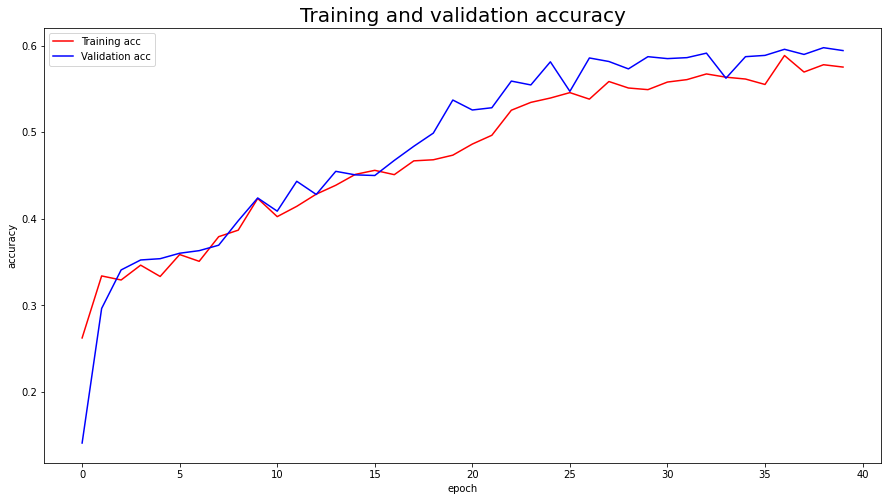

<Figure size 432x288 with 0 Axes>

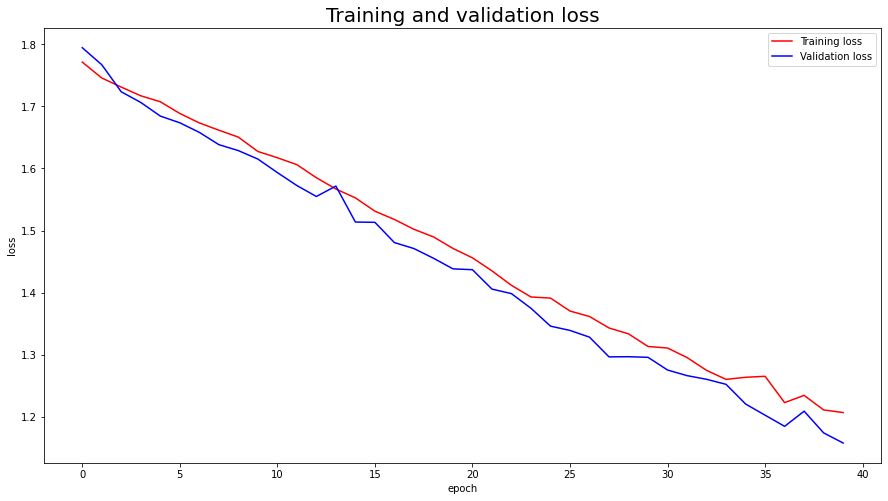

<Figure size 432x288 with 0 Axes>

In [38]:

#Graphing our training and validation
acc = final_history['accuracy']
val_acc = final_history['val_accuracy']
loss = final_history['loss']
val_loss = final_history['val_loss']

plt.figure(figsize=(15, 8))

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training acc')
plt.plot(epochs, val_acc, 'b', label='Validation acc')
plt.title('Training and validation accuracy', fontsize=20)
plt.ylabel('accuracy') 
plt.xlabel('epoch')
plt.legend()
plt.figure()


plt.figure(figsize=(15, 8))

epochs = range(len(loss))

plt.plot(epochs, loss, 'r', label='Training loss')
plt.plot(epochs, val_loss, 'b', label='Validation loss')
plt.title('Training and validation loss', fontsize=20)
plt.ylabel('loss') 
plt.xlabel('epoch')
plt.legend()
plt.figure()